In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

本模块的函数族旨在提供对多个时效预报数据进行对比分析的图形产品，在浏览本模块函数说明之前可先参阅函数本模块测试用的[数据简介](https://www.showdoc.cc/nmc?page_id=3831227192066999)

In [2]:
###################以下开始为数据收集部分的程序

#设置关注的起始时段
time_start = datetime.datetime(2019,7,1,8,0)   
time_end = datetime.datetime(2019,7,6,8,0)
#读取站点列表，并将站点内容为缺省值，当其作为读取站点数据的参数时，如果站点文件中某个站号不存在时,返回结果中该站点保持为缺省值
station = meb.read_stadata_from_micaps3(r"H:\test_data\input\mpd\ob\temp_2m\BT19010102.000")
station.iloc[:,-1] = meb.IV 


##读取收集观测数据
dir_ob = r"H:\test_data\input\mpd\ob\temp_2m\BTYYMMDDHH.000"
sta_list = []
time0 = time_start
while time0 < time_end:
    path = meb.get_path(dir_ob,time0)
    sta = meb.read_stadata_from_micaps3(path,station = station,time = time0,dtime = 0,level = 0,data_name = "ob")
    sta_list.append(sta)
    time0 += datetime.timedelta(hours = 3)
ob_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
ob_sta_all = meb.sele_by_para(ob_sta_all,value=[-100,100]) #简单的质量控制

#读取收集ec预报数据
dir_ec = r"H:\test_data\input\mpd\ec\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_ec,time0,dh)
        grd = meb.read_griddata_from_micaps4(path,level = 0,time = time0,dtime = dh,data_name = "ecmwf")
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            sta_list.append(sta)
    time0 += datetime.timedelta(hours = 12)  #此处跳着读是为了减少测试用时
ec_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
            
#读取收集grapes预报数据
dir_grapes = r"H:\test_data\input\mpd\grapes\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_grapes,time0,dh)
        grd = meb.read_griddata_from_micaps4(path,level = 0,time = time0,dtime = dh,data_name = "grapes")
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            sta_list.append(sta)  
    time0 += datetime.timedelta(hours = 12)
grapes_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
#数据匹配合并
sta_all = meb.combine_on_obTime_id(ob_sta_all,[ec_sta_all,grapes_sta_all])
sta_all = meb.sele_by_para(sta_all,drop_IV = True)  #删除包含缺省值的样本

###################以上为数据收集部分的程序

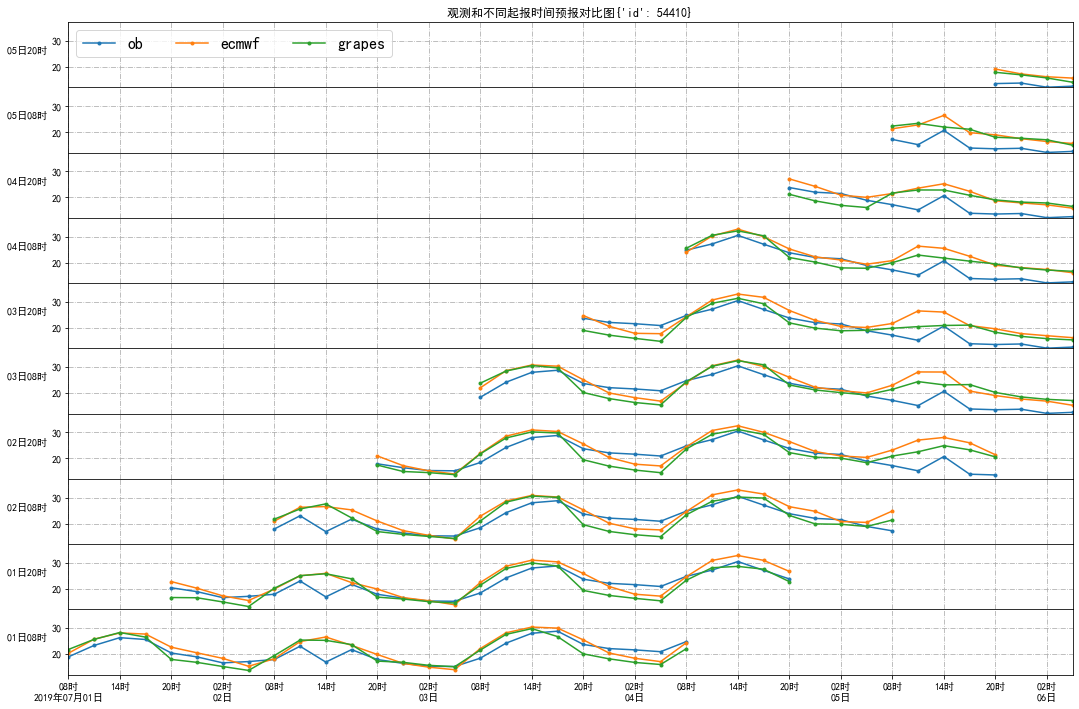

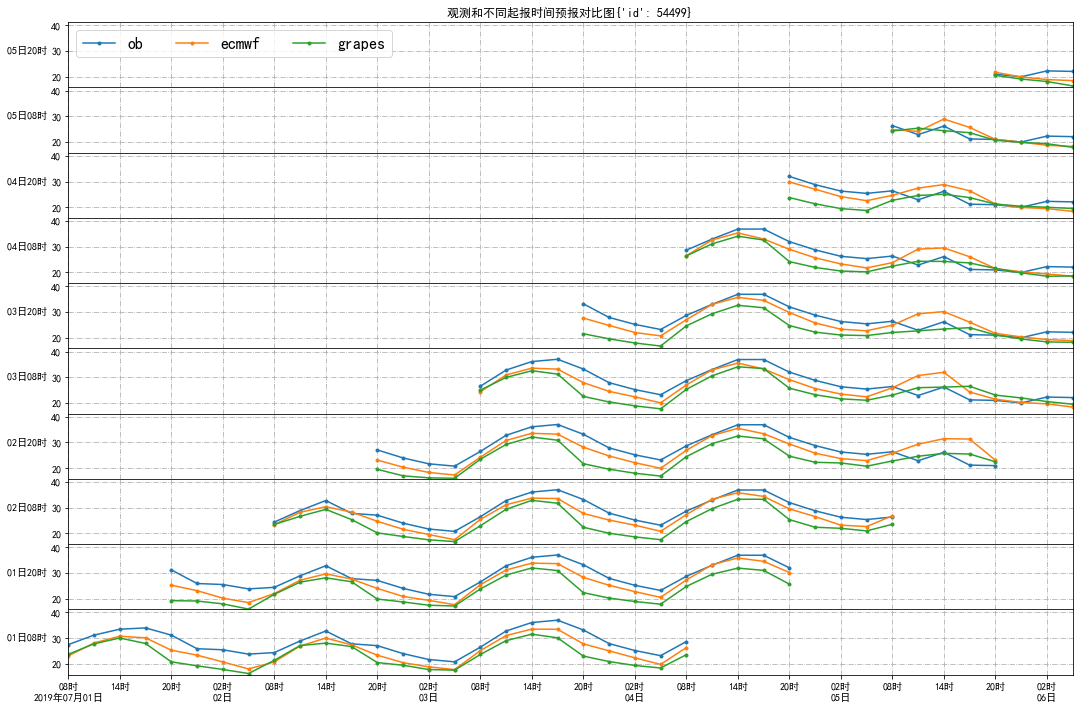

In [3]:
sta_part = meb.sele_by_dict(sta_all,s = {"id":[54499,54410]})
mpd.time_list_line(sta_part)

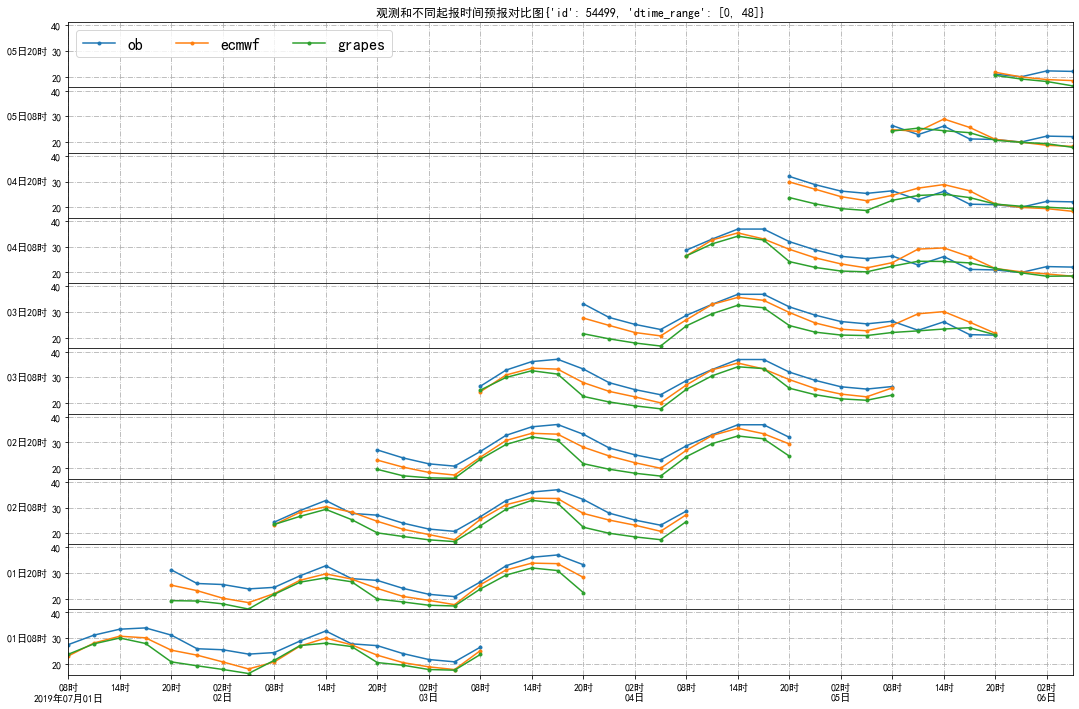

In [4]:
mpd.time_list_line(sta_part,s={"id":54499,"dtime_range":[0,48]})

In [5]:
sta_fo_all = meb.combine_on_obTime_id(None,[ec_sta_all,grapes_sta_all])

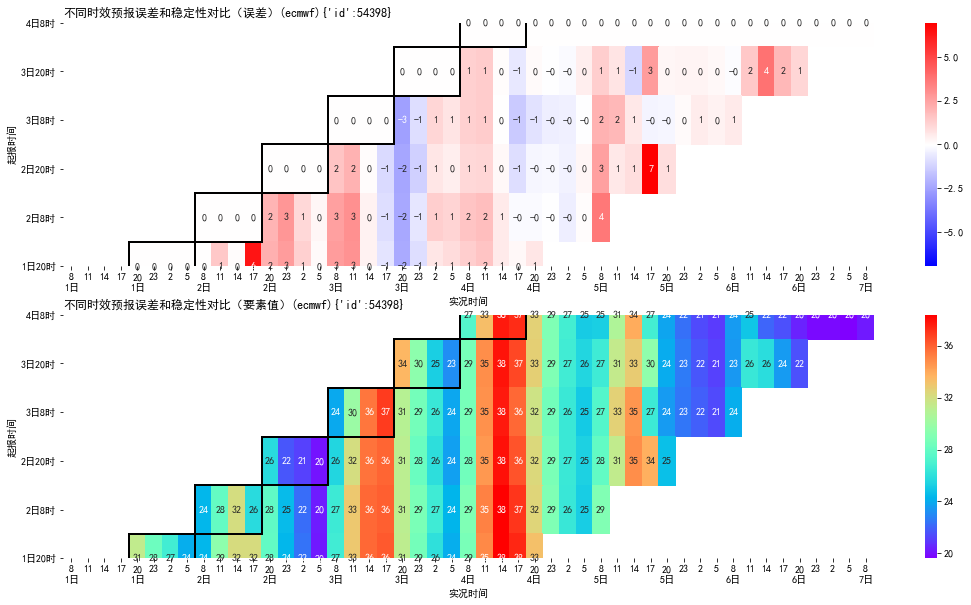

In [7]:
mpd.time_list_mesh(ob_sta_all,sta_fo_all,s={"time_range":["2019010108","2019070408"],"id":54398,"member":"ecmwf"})

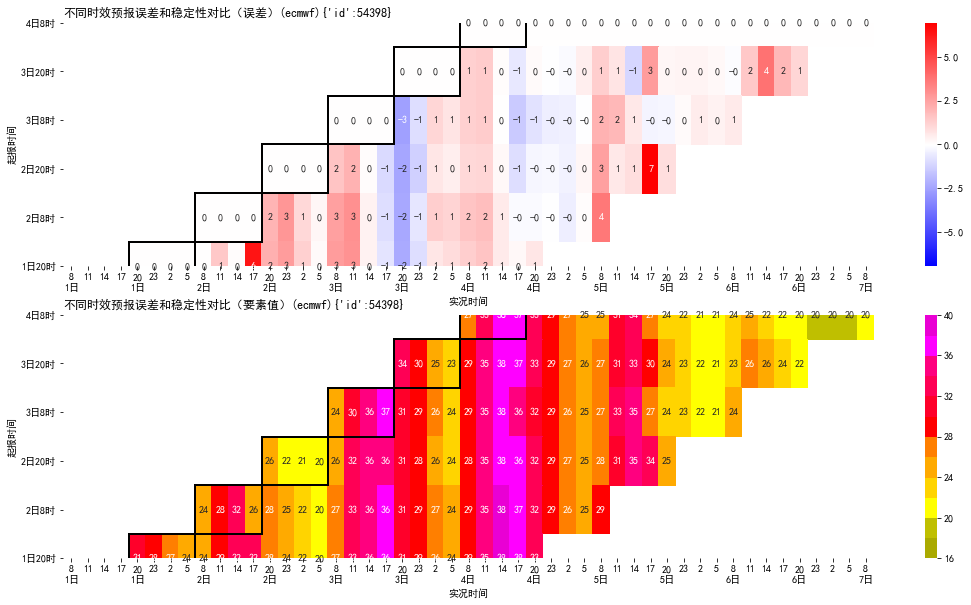

In [8]:
mpd.time_list_mesh_temp(ob_sta_all,sta_fo_all,s={"time_range":["2019010108","2019070408"],"id":54398,"member":"ecmwf"})

以下将展示其它类别要素的产品调用示例和效果，为了节省示例程序的测试数据量，事先将单个站点58361的少量观测和预报数据存成csv文件，在此进行读取和使用。

In [2]:
ip,port = meb.read_gds_ip_port( r"H:\test_data\input\meb\ip_port.txt")

In [4]:
id = 54511
sta_list = []
times = datetime.datetime(2020,3,20,8,0)
timee = datetime.datetime(2020,3,20,8,0)
time = times
dir1 = r"SURFACE/PLOT_NATIONAL/YYYYMMDDHH0000.000"
station = pd.DataFrame({"id":54511,"lon":119,"1at":40})
while time< timee:
    path = meb.get_path(dir1,time)
    sta = meb.read_stadata_from_gds_griddata(ip,port,path,station = station)
    time = time+datetime.timedelta(hours = 3)
    sta_list.append(sta)

ValueError: If using all scalar values, you must pass an index